## Import libraries, packages, Set paths

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import os
import sys
import subprocess
import re
import glob
import argparse
import shutil
import json
import nibabel as nib
from nilearn import plotting
from nilearn.image import load_img, mean_img, new_img_like, resample_to_img, threshold_img, high_variance_confounds
from nilearn import datasets
from nilearn import maskers
from nilearn import signal
from nipype.interfaces.fsl.utils import ImageMeants
from nilearn.glm.first_level import FirstLevelModel
from nilearn.interfaces.fsl import get_design_from_fslmat
from statsmodels.stats.outliers_influence import variance_inflation_factor
from nilearn.plotting import plot_stat_map, plot_glass_brain, plot_epi, plot_contrast_matrix
from nilearn.plotting import plot_design_matrix, plot_anat, plot_img, plot_roi


## Pain Design Matrix from Group Analysis - May 2, 2023

In [ ]:
df_mca_pain = get_design_from_fslmat('/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/FSL_Pain/Gp_Ana-Pain_ME2_all_cope1_050223.gfeat/design.mat', column_names=None) 
df_mca_pain

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# compute thw sum of the columns in the design matrix 
df_mca_pain.sum(axis=0)
# df_mca_pain.sum(axis=0).plot(kind='bar')
# plt.show()
# print the sum of the columns in the design matrix
print(df_mca_pain.sum(axis=0))

0     50.0
1     17.0
2     17.0
3     17.0
4      2.0
5      2.0
6      2.0
7      2.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     2.0
14     2.0
15     2.0
16     2.0
17     2.0
18     2.0
19     2.0
20     2.0
21     2.0
22     2.0
23     2.0
24     2.0
25     2.0
26     2.0
27     2.0
28     2.0
29     2.0
30     2.0
31     2.0
32     2.0
33     2.0
34     2.0
35     2.0
36     2.0
37     2.0
38     2.0
39     2.0
dtype: float64


## plotting

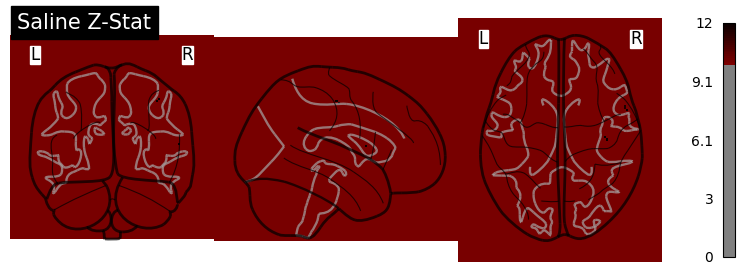

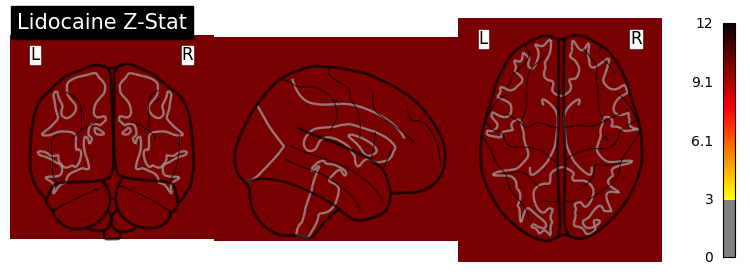

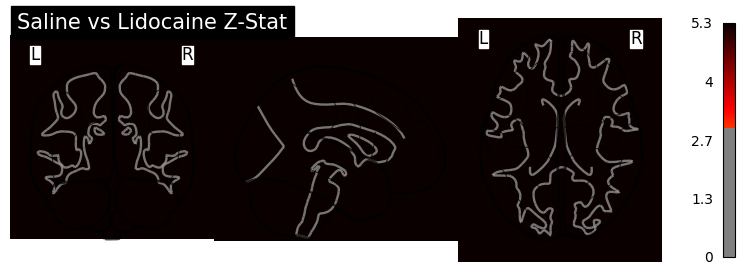

In [ ]:
# %matplotlib inline
from nilearn import plotting
# img = datasets.fetch_localizer_button_task()['tmap']
saline_z_avg='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat1.nii.gz'
plotting.plot_stat_map(saline_z_avg, threshold=, colorbar=True, title='Saline Z-Stat')
plotting.show()
lidocaine_z_avg='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat2.nii.gz'
plotting.plot_glass_brain(lidocaine_z_avg, threshold=3, colorbar=True, title='Lidocaine Z-Stat')
plotting.show()
salvsLid_z_diff='/Volumes/cerebro/Studies/VOGT/NeuCLA/Public/Data/Group_Analysis/Gp_Ana_n27_z2-p05_ME12_fdrms1pt5_CmCr-n5_02072024_112000.gfeat/cope1.feat/rendered_thresh_zstat3.nii.gz'
plotting.plot_glass_brain(salvsLid_z_diff, threshold=3, colorbar=True, title='Saline vs Lidocaine Z-Stat')    
plotting.show()



### Surface Plots for group Z-stats

In [ ]:
view = plotting.view_img_on_surf(saline_z_avg, black_bg=True , threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Saline Average Z-Stat') # symmetric_cmap=False)
view.open_in_browser()


In [ ]:
view = plotting.view_img_on_surf(lidocaine_z_avg, threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Lidocaine Average Z-Stat') # symmetric_cmap=False)
view.open_in_browser()

In [ ]:
view = plotting.view_img_on_surf(salvsLid_z_diff, threshold='90%', surf_mesh='fsaverage', darkness=0.25, title='Saline Vs Lidocaine Z-Stat') # symmetric_cmap=False)
view.open_in_browser()

## FDRMS PAIN

In [3]:
MCA_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data'
MCA_Pain_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA*_Ses*/Pain*_func/MCA*_Ses*_Pain*'

MCA_Pain_path = '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA*_Ses*/Pain_func/MCA*_Pain*'
# MCA_files = glob.glob(MCA_Pain_path)

In [4]:
# get all pain data 
pain = glob.glob(MCA_Pain_path + '_corrected.nii.gz')
pain.sort()
pain

['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses1/Pain_func/MCA100_Ses1_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses2/Pain_func/MCA100_Ses2_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses1/Pain_func/MCA103_Ses1_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses2/Pain_func/MCA103_Ses2_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses1/Pain_func/MCA104_Ses1_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses2/Pain_func/MCA104_Ses2_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA105_Ses1/Pain_func/MCA105_Ses1_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA105_Ses2/Pain_func/MCA105_Ses2_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA106_Ses1/Pain_func/MCA106_Ses1_Pain_corrected.nii.gz',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Dat

In [5]:
# get all fdrms data from the path MCA_Pain_path as a list
fdrms = glob.glob(MCA_Pain_path + '*fdrms*.txt')
fdrms.sort()
fdrms

['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses1/Pain_func/MCA100_Ses1_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA100_Ses2/Pain_func/MCA100_Ses2_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses1/Pain_func/MCA103_Ses1_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA103_Ses2/Pain_func/MCA103_Ses2_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses1/Pain_func/MCA104_Ses1_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA104_Ses2/Pain_func/MCA104_Ses2_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA105_Ses1/Pain_func/MCA105_Ses1_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA105_Ses2/Pain_func/MCA105_Ses2_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA106_Ses1/Pain_func/MCA106_Ses1_Pain_fdrms.txt',
 '/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA107_Ses1/Pain_func/MCA107_Ses1_Pain_fdrms.txt',
 '/Volumes

In [6]:
len(fdrms)

148

In [7]:
# get all the data in the fdrms files as a dataframe
fdrms_data = [pd.read_csv(x, sep='\t', header=None) for x in fdrms]
fdrms_data

[            0
 0    0.000000
 1    0.026162
 2    0.030402
 3    0.079546
 4    0.118373
 ..        ...
 175  0.123968
 176  0.022056
 177  0.031967
 178  0.096610
 179  0.067861
 
 [180 rows x 1 columns],
             0
 0    0.000000
 1    0.072938
 2    0.166969
 3    0.033244
 4    0.075902
 ..        ...
 175  0.706915
 176  0.296990
 177  0.122731
 178  0.093732
 179  0.094570
 
 [180 rows x 1 columns],
             0
 0    0.000000
 1    0.161948
 2    0.364059
 3    0.186586
 4    0.329121
 ..        ...
 175  0.414048
 176  0.436461
 177  0.078918
 178  0.533656
 179  0.328310
 
 [180 rows x 1 columns],
             0
 0    0.000000
 1    0.102793
 2    0.381436
 3    0.343792
 4    0.147654
 ..        ...
 175  0.148246
 176  0.609740
 177  0.432896
 178  0.184199
 179  0.646366
 
 [180 rows x 1 columns],
             0
 0    0.000000
 1    0.211109
 2    0.032877
 3    0.049196
 4    0.092576
 ..        ...
 175  0.085217
 176  0.192755
 177  0.179994
 178  0.113994
 179  0

In [8]:
# print the shape of fdrms_data
for i in range(len(fdrms_data)):
    print(fdrms_data[i].shape)

(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(177, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(180, 1)
(

In [9]:
# append all the fdrms_data dataframes as columns to a new dataframe of shape (180, subj)
df_fdrms = pd.concat(fdrms_data, axis=1)

# assign the column names as the subject IDs
df_fdrms.columns = [os.path.basename(x)[:-10] for x in fdrms]
# df_fdrms.columns = [os.path.basename(x).split('_')[0]+os.path.basename(x).split('_')[1]+os.path.basename(x).split('_')[2] for x in fdrms]
# df_fdrms.columns = [os.path.basename(x) for x in fdrms]


df_fdrms

df_fdrms.shape


(180, 148)

In [12]:
df_fdrms

,MCA100_Ses1_Pain,MCA100_Ses2_Pain,MCA103_Ses1_Pain,MCA103_Ses2_Pain,MCA104_Ses1_Pain,MCA104_Ses2_Pain,MCA105_Ses1_Pain,MCA105_Ses2_Pain,MCA106_Ses1_Pain,MCA107_Ses1_Pain,...,MCA94_Ses1_Pain,MCA94_Ses2_Pain,MCA95_Ses1_Pain,MCA96_Ses1_Pain,MCA98_Ses1_Pain,MCA98_Ses2_Pain,MCA99_Ses1_Pain,MCA99_Ses2_Pain,MCA9_Ses1_Pain,MCA9_Ses2_Pain
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.026162,0.072938,0.161948,0.102793,0.211109,0.101242,0.025833,0.038949,0.038588,0.034519,...,0.048681,0.023693,0.030562,0.040553,0.027000,0.026643,0.420530,0.055350,0.049992,0.037566
2,0.030402,0.166969,0.364059,0.381436,0.032877,0.114652,0.041311,0.083349,0.087339,0.044646,...,0.038622,0.029019,0.058340,0.056805,0.125233,0.090447,0.277862,0.071604,0.096321,0.128792
3,0.079546,0.033244,0.186586,0.343792,0.049196,0.044453,0.022833,0.045719,0.184735,0.025824,...,0.051020,0.078271,0.042014,0.021919,0.126069,0.024700,0.119701,0.030551,0.029255,0.050348
4,0.118373,0.075902,0.329121,0.147654,0.092576,0.140743,0.017415,0.051399,0.115349,0.019021,...,0.037586,0.111622,0.041088,0.057005,0.050082,0.022977,0.039778,0.162458,0.042027,0.108402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.123968,0.706915,0.414048,0.148246,0.085217,0.031854,0.054688,0.013188,0.035404,0.057693,...,0.013037,0.013244,0.298910,0.015095,0.039727,0.030413,0.083819,0.115861,0.073297,0.057851
176,0.022056,0.296990,0.436461,0.609740,0.192755,0.087180,0.010201,0.022892,0.152435,0.014305,...,0.062849,0.021394,0.153939,0.033830,0.114241,0.099842,0.030561,0.062216,0.076738,0.127192
177,0.031967,0.122731,0.078918,0.432896,0.179994,0.107507,0.060199,0.082163,0.059672,0.059499,...,0.294385,0.070359,0.062131,0.061676,0.099498,0.046380,0.055650,0.021891,0.143546,0.041584
178,0.096610,0.093732,0.533656,0.184199,0.113994,0.021478,0.060394,0.059230,0.108409,0.067979,...,0.129475,0.101777,0.080659,0.064947,0.024570,0.102904,0.017944,0.041862,0.058696,0.116515


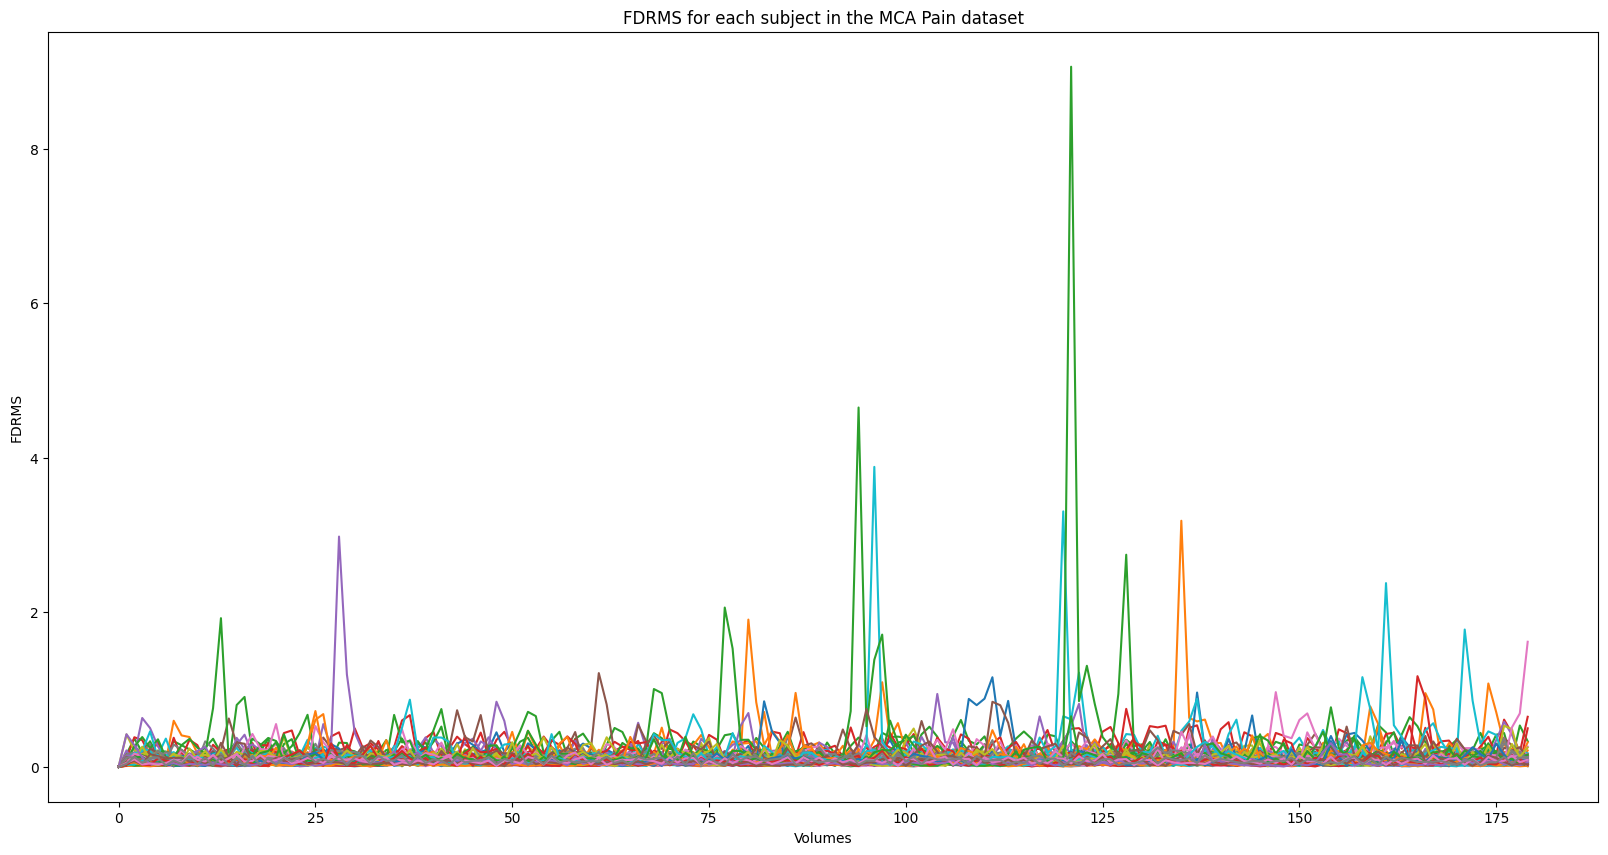

In [10]:
# plot the fdrms data from df_fdrms as a line plot 
plt.figure(figsize=(20, 10))
plt.plot(df_fdrms)
plt.title('FDRMS for each subject in the MCA Pain dataset')
plt.xlabel('Volumes')
plt.ylabel('FDRMS')
# plt.legend(df_fdrms.columns)
plt.show()

In [11]:
# show column names of the fdrms data that have values greater than 4
df_fdrms_4m_labels = df_fdrms.columns[df_fdrms.gt(4).any()]
df_fdrms_4m_labels


Index(['MCA76_Ses2_Pain', 'MCA83_Ses2_Pain'], dtype='object')

In [12]:
# show column names of the fdrms data that have values greater than 4
df_fdrms_2m_labels = df_fdrms.columns[df_fdrms.gt(2).any()]
df_fdrms_2m_labels

Index(['MCA104_Ses1_Pain', 'MCA108_Ses1_Pain', 'MCA33_Ses1_Pain',
       'MCA56_Ses2_Pain', 'MCA76_Ses2_Pain', 'MCA83_Ses2_Pain'],
      dtype='object')

In [16]:
# show column values of the fdrms data that have values greater than 2
df_fdrms_2m_outliers = df_fdrms[df_fdrms_2m_labels]
df_fdrms_2m_outliers

,MCA104_Ses1_Pain,MCA108_Ses1_Pain,MCA33_Ses1_Pain,MCA56_Ses2_Pain,MCA76_Ses2_Pain,MCA83_Ses2_Pain
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.211109,0.059194,0.132702,0.131299,0.079564,0.019147
2,0.032877,0.052806,0.090028,0.094853,0.263074,0.033612
3,0.049196,0.042074,0.080713,0.072892,0.384079,0.036867
4,0.092576,0.054579,0.101877,0.059696,0.240435,0.079954
...,...,...,...,...,...,...
175,0.085217,0.079627,0.042497,0.411533,0.114730,0.124056
176,0.192755,0.071429,0.095030,0.090129,0.073442,0.128844
177,0.179994,0.066942,0.049925,NaN,NaN,NaN
178,0.113994,0.031277,0.136010,NaN,NaN,NaN


In [13]:
# show column values of the columns in df_fdrms_4m_outliers
df_fdrms_4m_outliers = df_fdrms[df_fdrms_4m_labels]
df_fdrms_4m_outliers


,MCA76_Ses2_Pain,MCA83_Ses2_Pain
0,0.000000,0.000000
1,0.079564,0.019147
2,0.263074,0.033612
3,0.384079,0.036867
4,0.240435,0.079954
...,...,...
175,0.114730,0.124056
176,0.073442,0.128844
177,NaN,NaN
178,NaN,NaN


In [18]:
# compute the mean, median, standard deviation of each column of the df_fdrms dataframe and save as new columns in the df_fdrms_stats dataframe
df_fdrms_stats = pd.DataFrame()
df_fdrms_stats['mean'] = df_fdrms.mean(axis=0)
df_fdrms_stats['median'] = df_fdrms.median(axis=0)
df_fdrms_stats['std'] = df_fdrms.std(axis=0)

# add row labels to the df_fdrms_stats dataframe from 1 to 148
df_fdrms_stats.index = range(1, 149)
df_fdrms_stats


,mean,median,std
1,0.055895,0.052818,0.026686
2,0.080432,0.060103,0.125855
3,0.250406,0.244325,0.128822
4,0.263881,0.253406,0.149210
5,0.167816,0.138433,0.238612
...,...,...,...
144,0.066207,0.056082,0.046863
145,0.055759,0.045088,0.050553
146,0.065601,0.056983,0.038822
147,0.077129,0.078008,0.035810


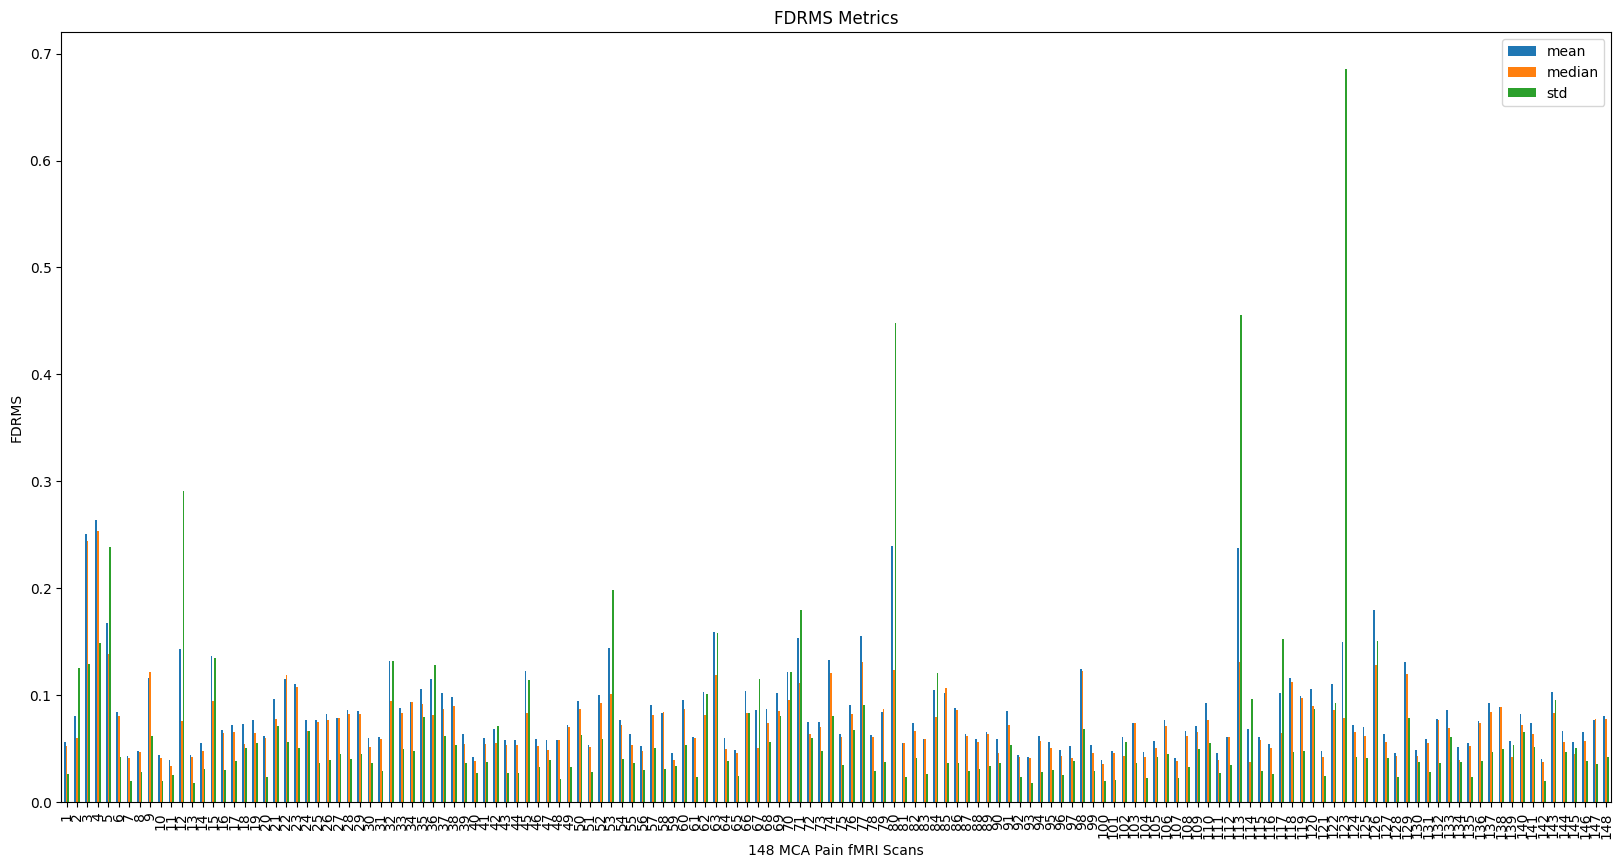

In [19]:
# plot the first column of df_fdrms_stats as a bar plot
df_fdrms_stats.plot(kind='bar', figsize=(20, 10))
plt.title('FDRMS Metrics')
plt.xlabel('148 MCA Pain fMRI Scans')
plt.ylabel('FDRMS')
plt.show()


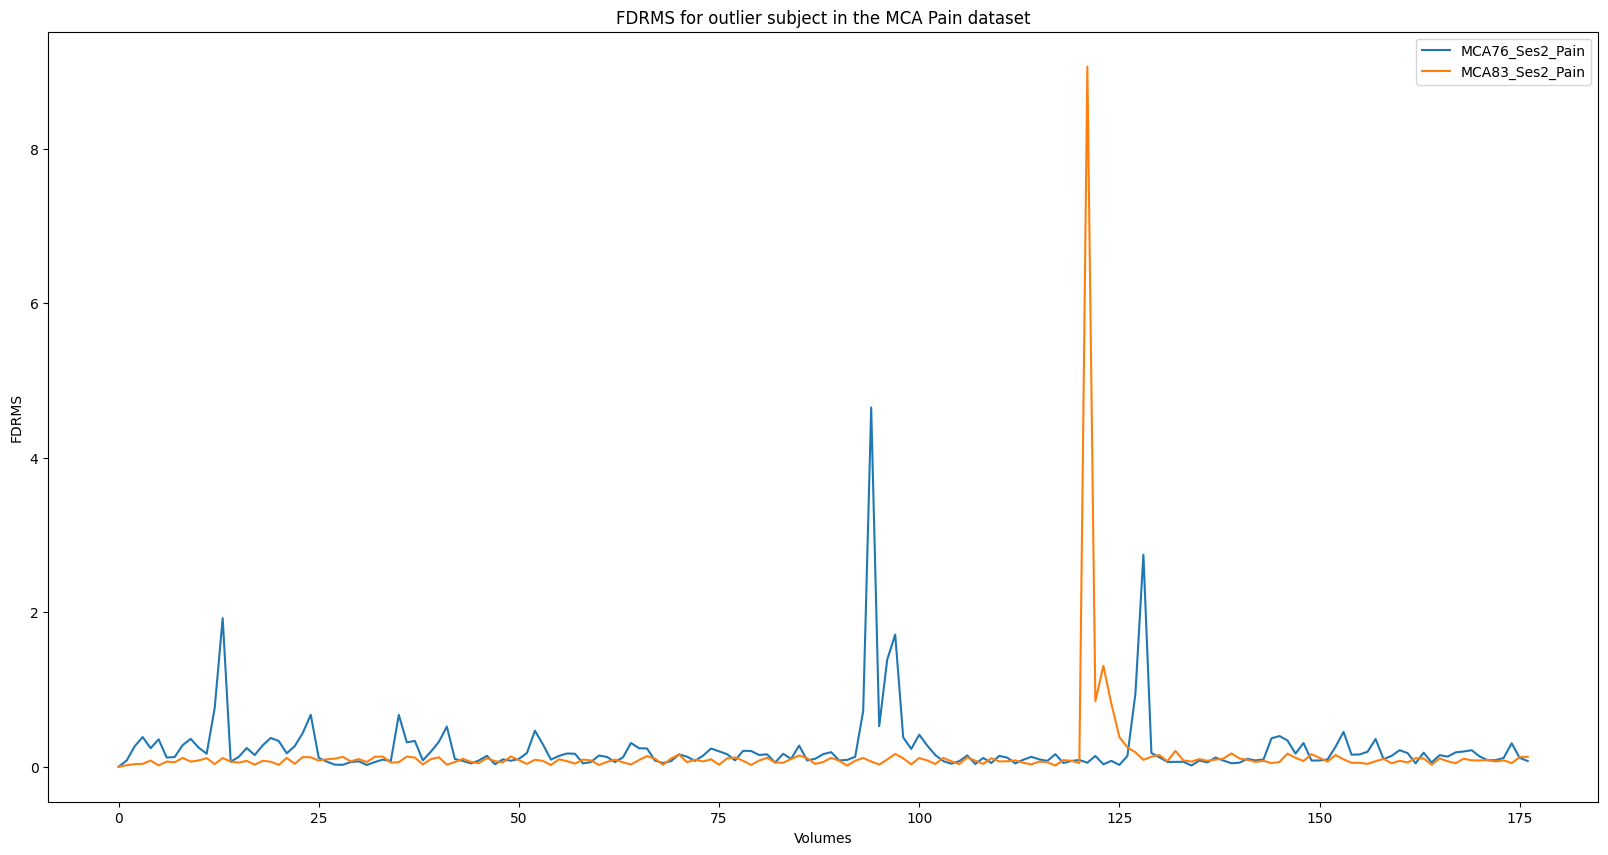

In [14]:
# plot each of the dataframes in df_fdrms_4m_outliers as a line plot
plt.figure(figsize=(20, 10))
plt.plot(df_fdrms_4m_outliers)
plt.title('FDRMS for outlier subject in the MCA Pain dataset')
plt.xlabel('Volumes')
plt.ylabel('FDRMS')
plt.legend(df_fdrms_4m_outliers.columns)
plt.show()

# plot the same as violin plots
# plt.figure(figsize=(20, 10))
# sns.violinplot(data=df_fdrms_4m_outliers)
# plt.title('FDRMS for each subject session in the MCA dataset')
# plt.xlabel('Volumes')
# plt.ylabel('FDRMS')
# plt.legend(df_fdrms_4m_outliers.columns)
# plt.show()

## From email 04-08-2024 -Scrubbing >2mm FDRMS outliers for >1% of total data points


In [ ]:
# find % outlier for values greater than 2 in df_fdrms_2m_outliers
df_fdrms_2m_outliers_perc = df_fdrms_2m_outliers.gt(2).sum()/df_fdrms_2m_outliers.shape[0]*100
df_fdrms_2m_outliers_perc

MCA104_Ses1_Pain    0.555556
MCA108_Ses1_Pain    0.555556
MCA33_Ses1_Pain     0.555556
MCA56_Ses2_Pain     1.666667
MCA76_Ses2_Pain     1.666667
MCA83_Ses2_Pain     1.666667
dtype: float64

In [ ]:
# For scrubbing, get the labels of the columns that have values greater than 1% in df_fdrms_2m_outliers_perc
df_fdrms_2m_outliers_perc_labels = df_fdrms_2m_outliers_perc[df_fdrms_2m_outliers_perc.gt(1)].index
df_fdrms_2m_outliers_perc_labels.to_list()

['MCA56_Ses2_Pain', 'MCA76_Ses2_Pain', 'MCA83_Ses2_Pain']

In [63]:
# get values of df_fdrms using df_fdrms_2m_outliers_perc_labels
df_fdrms_2m_outliers_toscrub = df_fdrms[df_fdrms_2m_outliers_perc_labels]
df_fdrms_2m_outliers_toscrub

,MCA56_Ses2_Pain,MCA76_Ses2_Pain,MCA83_Ses2_Pain
0,0.000000,0.000000,0.000000
1,0.138608,0.067697,0.017620
2,0.087031,0.277303,0.032743
3,0.061594,0.374760,0.031042
4,0.055797,0.329789,0.075996
...,...,...,...
175,0.857219,0.092978,0.072826
176,0.295844,0.117807,0.082670
177,0.452637,0.383292,0.043389
178,0.399897,0.115068,0.128865


In [64]:
# binarize the fdrms data in df_fdrms_2m_outliers by setting values less than 2 to 1 and values greater than 2 to 0
df_fdrms_2m_outliers_toscrub_bin = df_fdrms_2m_outliers_toscrub.lt(2).astype(int)
df_fdrms_2m_outliers_toscrub_bin

,MCA56_Ses2_Pain,MCA76_Ses2_Pain,MCA83_Ses2_Pain
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
175,1,1,1
176,1,1,1
177,1,1,1
178,1,1,1


In [66]:
# get corrected.nii.gz from the path MCA_Pain_path as a list
MCA_data = [None] * len(df_fdrms_2m_outliers_perc_labels)
MCA_Scans_FDRMS2mm = [None] * len(df_fdrms_2m_outliers_perc_labels)
for i in range(len(df_fdrms_2m_outliers_perc_labels)):
    MCA_data[i] = '/' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[0] + '_' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[1] + '_' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[2] + '_corrected.nii.gz'
    MCA_Scans_FDRMS2mm[i] = glob.glob(MCA_path + '/' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[0] + '_' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[1] + '/' + (df_fdrms_2m_outliers_perc_labels[i]).split('_')[2] + '_func' + MCA_data[i])

MCA_data.sort()
MCA_data
MCA_Scans_FDRMS2mm.sort()
MCA_Scans_FDRMS2mm

[['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA56_Ses2/Pain_func/MCA56_Ses2_Pain_corrected.nii.gz'],
 ['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA76_Ses2/Pain_func/MCA76_Ses2_Pain_corrected.nii.gz'],
 ['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA83_Ses2/Pain_func/MCA83_Ses2_Pain_corrected.nii.gz']]

In [67]:
# scrubbing the vols/ tpts from df_fdrms_2m_labels
from nilearn.image import get_data
import nibabel as nib
for i in range(len(MCA_Scans_FDRMS2mm)):
    MCA_Scan = load_img(MCA_Scans_FDRMS2mm[i])

    print(MCA_Scans_FDRMS2mm[i])
    print(MCA_Scan.shape)
    MCA_Scan = get_data(MCA_Scan)
    
    ind_keep = df_fdrms_2m_outliers_toscrub_bin.iloc[:, i].astype(bool)
    # remove all values in ind_keep after MCA_Scan.shape[3]
    ind_keep = ind_keep[:MCA_Scan.shape[3]]
    MCA_Scan_Censored = MCA_Scan[:, :, :, ind_keep]

    MCA_Scan_Scrubbed = new_img_like(MCA_Scans_FDRMS2mm[i], MCA_Scan_Censored)
    MCA_Scan_Scrubbed.to_filename(MCA_Scans_FDRMS2mm[i][0][:-7] + '_scrubbed.nii.gz')

    print(MCA_Scan_Censored.shape)


['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA56_Ses2/Pain_func/MCA56_Ses2_Pain_corrected.nii.gz']
(110, 110, 60, 180)
(110, 110, 60, 177)
['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA76_Ses2/Pain_func/MCA76_Ses2_Pain_corrected.nii.gz']
(110, 110, 60, 180)
(110, 110, 60, 177)
['/Volumes/cerebro/Studies/MCA_FMRI/Public/Data/MCA83_Ses2/Pain_func/MCA83_Ses2_Pain_corrected.nii.gz']
(110, 110, 60, 180)
(110, 110, 60, 177)


The second motion outlier detection for these scans can be done by running the script **MCA_Pain_Motion_Outliers.sh** for the scrubbed data. This needs to be done for the scrubbed data wouldn't match the quantity of volumes/timepoints in the motion confounds file for GLM analysis.

##  Result/Figures/Data Viz.-- see pptx from 2/15/2024

## Data Viz and Figures